# February 5, 2019
Larger data set, want to find likelihoods without doing the whole MCMC thing

In [1]:
from astropy.table import Table, Column, vstack
import os
import matplotlib.pyplot as plt

import astropy.units as u
import emcee

import pickle as rick

In [2]:
%run "/home/cody/Binary Search/DataSimp"
tables = DataSimp("/home/cody/Binary Search/mc_rgb_nocuts.fits",
                  "/home/cody/Binary Search/bayesian likelihood/allVisit.mcs.011619.fits",
                  "/home/cody/Binary Search/parsec_decamsdss_all.fits.gz")



In [3]:
# Get the data from the fits files
all_average, all_visit, iso = tables.get_data()

In [5]:
# Cut out low SNR observations, and velocity values that are too large
all_visit = tables.cuts(all_visit)

In [6]:
# Recalculate the nvisit values
all_average = Table(all_average)


In [9]:
def my_nvisit(allAverage, allVisit):
    my_visits = []
    for name in allAverage['APOGEE_ID']:
        visit_foo = allVisit[allVisit['APOGEE_ID'] == name]
        my_visits.append(len(visit_foo))
    allAverage["MY_NVISITS"] = my_visits
    return allAverage

In [10]:
all_average = my_nvisit(all_average, all_visit)

In [11]:
# Only keep stars that have at least 5 observations
all_average = all_average[all_average['MY_NVISITS'] >= 5]


In [12]:
min(all_average['MY_NVISITS'])

5

In [13]:
# Make sure all the stars are red giant stars
all_average = tables.rg_cut(all_average)


In [14]:
# Add isochrone values
all_average = tables.iso_fit(all_average, iso)

Done with 0.000000
No good fits in 3 sigma of erros. Star 2M05185059-6910148, row 30
Done with 100.000000
No good fits in 3 sigma of erros. Star 2M05300978-6938196, row 134
No good fits in 3 sigma of erros. Star 2M05411584-6713553, row 170
No good fits in 3 sigma of erros. Star 2M05423555-6716030, row 185
Done with 200.000000
No good fits in 3 sigma of erros. Star 2M05491308-6739521, row 229
No good fits in 3 sigma of erros. Star 2M05455705-7106563, row 269
Done with 300.000000
No good fits in 3 sigma of erros. Star 2M05504726-7121581, row 330
No good fits in 3 sigma of erros. Star 2M05574981-7048082, row 385
Done with 400.000000
No good fits in 3 sigma of erros. Star 2M05140287-7214484, row 424
Done with 500.000000
No good fits in 3 sigma of erros. Star 2M05205391-7259483, row 517
No good fits in 3 sigma of erros. Star 2M05214222-7227340, row 532
No good fits in 3 sigma of erros. Star 2M05215411-7316058, row 538
No good fits in 3 sigma of erros. Star 2M05235220-7216056, row 565
Done w

No good fits in 3 sigma of erros. Star 2M01400661-7119565, row 2828
No good fits in 3 sigma of erros. Star 2M01402142-7151236, row 2832
No good fits in 3 sigma of erros. Star 2M01403048-7118146, row 2836
No good fits in 3 sigma of erros. Star 2M01403166-7141448, row 2837
No good fits in 3 sigma of erros. Star 2M01411336-7144317, row 2842
No good fits in 3 sigma of erros. Star 2M01435235-7144514, row 2868
No good fits in 3 sigma of erros. Star 2M01440501-7144459, row 2872
No good fits in 3 sigma of erros. Star 2M01443027-7125123, row 2877
No good fits in 3 sigma of erros. Star 2M01470718-7126040, row 2887
No good fits in 3 sigma of erros. Star 2M00182783-7759212, row 2895
No good fits in 3 sigma of erros. Star 2M00190728-7731356, row 2896
Done with 2900.000000
No good fits in 3 sigma of erros. Star 2M00340349-6749594, row 2907
No good fits in 3 sigma of erros. Star 2M00420966-6757439, row 2919
No good fits in 3 sigma of erros. Star 2M00422381-6738579, row 2922
No good fits in 3 sigma of

In [27]:
# # Add radial velocity columns to the average table
# all_average_2 = tables.rv_table_add(all_average, all_visit)

In [32]:
# all_average_2 = None

In [16]:
foo = Table(all_average, copy = True)
RV_Column = Column(name = 'RADIALV', data = np.ones(len(foo)), dtype = 'object') #Right now filling it with ones just as a place holder
ERR_Column = Column(name = 'RADIAL_ERR', data = np.ones(len(foo)),dtype = 'object') # Why a string limit of 151? Because that's when I stopped getting errors.
DATE_Column = Column(name = 'RADIAL_DATE', data = np.ones(len(foo)),dtype = 'object')
foo.add_columns([RV_Column,ERR_Column,DATE_Column], [0,0,0])


In [17]:
foo

RADIALV,RADIAL_ERR,RADIAL_DATE,APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,H,H_ERR,K,K_ERR,RA,DEC,GLON,GLAT,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,TARGFLAGS,SURVEY,NINST [3],NVISITS,COMBTYPE,COMMISS,SNR,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,VERR_MED,OBSVHELIO_AVG,OBSVSCATTER,OBSVERR,OBSVERR_MED,SYNTHVHELIO_AVG,SYNTHVSCATTER,SYNTHVERR,SYNTHVERR_MED,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CCFWHM,RV_AUTOFWHM,SYNTHSCATTER,STABLERV_CHI2 [2],STABLERV_RCHI2 [2],CHI2_THRESHOLD [2],STABLERV_CHI2_PROB [2],MEANFIB,SIGFIB,SNREV,APSTAR_VERSION,ASPCAP_VERSION,RESULTS_VERSION,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,PARAM [9],FPARAM [9],"PARAM_COV [9,9]","FPARAM_COV [9,9]",TEFF,TEFF_ERR,LOGG,LOGG_ERR,VMICRO,VMACRO,VSINI,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,ASPCAP_CHI2,ASPCAP_CLASS,ASPCAPFLAG,ASPCAPFLAGS,PARAMFLAG [9],FELEM [26],FELEM_ERR [26],X_H [26],X_H_ERR [26],X_M [26],X_M_ERR [26],C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CU_FE,GE_FE,RB_FE,Y_FE,ND_FE,C_FE_ERR,CI_FE_ERR,N_FE_ERR,O_FE_ERR,NA_FE_ERR,MG_FE_ERR,AL_FE_ERR,SI_FE_ERR,P_FE_ERR,S_FE_ERR,K_FE_ERR,CA_FE_ERR,TI_FE_ERR,TIII_FE_ERR,V_FE_ERR,CR_FE_ERR,MN_FE_ERR,FE_H_ERR,CO_FE_ERR,NI_FE_ERR,CU_FE_ERR,GE_FE_ERR,RB_FE_ERR,Y_FE_ERR,ND_FE_ERR,C_FE_FLAG,CI_FE_FLAG,N_FE_FLAG,O_FE_FLAG,NA_FE_FLAG,MG_FE_FLAG,AL_FE_FLAG,SI_FE_FLAG,P_FE_FLAG,S_FE_FLAG,K_FE_FLAG,CA_FE_FLAG,TI_FE_FLAG,TIII_FE_FLAG,V_FE_FLAG,CR_FE_FLAG,MN_FE_FLAG,FE_H_FLAG,CO_FE_FLAG,NI_FE_FLAG,CU_FE_FLAG,GE_FE_FLAG,RB_FE_FLAG,Y_FE_FLAG,ND_FE_FLAG,ELEM_CHI2 [26],ELEMFLAG [26],REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK [50],VISIT_PK [50],"FPARAM_CLASS [23,9]",CHI2_CLASS [23],LMCPA,LMCRAD,SMCPA,SMCRAD,MLON,MLAT,M,MERR,DDO51ERR,T2,T2ERR,DELTA_VHELIO,DELTA_PMRA,DELTA_PMDEC,DELTA_FEH,DELTA_ALPHA,TARGET_TYPE,TARGET_NAME,PRIORITY,GAIA_SOURCEID,GAIA_PARALLAX,GAIA_PARALLAX_ERROR,GAIA_DIST05,GAIA_DIST_MODE,GAIA_DIST95,GAIA_PMRA,GAIA_PMRA_ERROR,GAIA_PMDEC,GAIA_PMDEC_ERROR,GAIA_GMAG,GAIA_BPMAG,GAIA_RPMAG,GAIA_PML,GAIA_PMB,GAIA_PMML,GAIA_PMMB,MY_NVISITS,ISO_MEANM,ISO_MEDIANM,ISO_STDM,ISO_MEANL,ISO_MEDIANL,ISO_STDL,ISO_MEANR
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,solMass,solMass,solMass,solLum,solLum,solLum,solRad
object,object,object,str47,str36,str59,str38,str18,str8,int32,str5,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,int32,int32,int32,int32,int32,int32,str192,str35,int32,int32,int32,int16,float32,int32,str165,int32,str58,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,str4,str7,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,int32,str189,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32

In [18]:
count = 0
for ID in foo['APOGEE_ID']:
    mask = all_visit['APOGEE_ID'] == ID
    rv_foo = np.array(all_visit['VHELIO'][mask])
    rv_err_foo = np.array(all_visit['VRELERR'][mask])
    rv_err_foo = np.array([.1 if n < 0.1 else n for n in rv_err_foo])
    date_foo = np.array(all_visit['JD'][mask])

    foo['RADIALV'][count] = rv_foo
    foo['RADIAL_ERR'][count] = rv_err_foo
    foo['RADIAL_DATE'][count] = date_foo
    count += 1

In [19]:
foo

RADIALV,RADIAL_ERR,RADIAL_DATE,APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,H,H_ERR,K,K_ERR,RA,DEC,GLON,GLAT,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,TARGFLAGS,SURVEY,NINST [3],NVISITS,COMBTYPE,COMMISS,SNR,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,VERR_MED,OBSVHELIO_AVG,OBSVSCATTER,OBSVERR,OBSVERR_MED,SYNTHVHELIO_AVG,SYNTHVSCATTER,SYNTHVERR,SYNTHVERR_MED,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CCFWHM,RV_AUTOFWHM,SYNTHSCATTER,STABLERV_CHI2 [2],STABLERV_RCHI2 [2],CHI2_THRESHOLD [2],STABLERV_CHI2_PROB [2],MEANFIB,SIGFIB,SNREV,APSTAR_VERSION,ASPCAP_VERSION,RESULTS_VERSION,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,PARAM [9],FPARAM [9],"PARAM_COV [9,9]","FPARAM_COV [9,9]",TEFF,TEFF_ERR,LOGG,LOGG_ERR,VMICRO,VMACRO,VSINI,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,ASPCAP_CHI2,ASPCAP_CLASS,ASPCAPFLAG,ASPCAPFLAGS,PARAMFLAG [9],FELEM [26],FELEM_ERR [26],X_H [26],X_H_ERR [26],X_M [26],X_M_ERR [26],C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CU_FE,GE_FE,RB_FE,Y_FE,ND_FE,C_FE_ERR,CI_FE_ERR,N_FE_ERR,O_FE_ERR,NA_FE_ERR,MG_FE_ERR,AL_FE_ERR,SI_FE_ERR,P_FE_ERR,S_FE_ERR,K_FE_ERR,CA_FE_ERR,TI_FE_ERR,TIII_FE_ERR,V_FE_ERR,CR_FE_ERR,MN_FE_ERR,FE_H_ERR,CO_FE_ERR,NI_FE_ERR,CU_FE_ERR,GE_FE_ERR,RB_FE_ERR,Y_FE_ERR,ND_FE_ERR,C_FE_FLAG,CI_FE_FLAG,N_FE_FLAG,O_FE_FLAG,NA_FE_FLAG,MG_FE_FLAG,AL_FE_FLAG,SI_FE_FLAG,P_FE_FLAG,S_FE_FLAG,K_FE_FLAG,CA_FE_FLAG,TI_FE_FLAG,TIII_FE_FLAG,V_FE_FLAG,CR_FE_FLAG,MN_FE_FLAG,FE_H_FLAG,CO_FE_FLAG,NI_FE_FLAG,CU_FE_FLAG,GE_FE_FLAG,RB_FE_FLAG,Y_FE_FLAG,ND_FE_FLAG,ELEM_CHI2 [26],ELEMFLAG [26],REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK [50],VISIT_PK [50],"FPARAM_CLASS [23,9]",CHI2_CLASS [23],LMCPA,LMCRAD,SMCPA,SMCRAD,MLON,MLAT,M,MERR,DDO51ERR,T2,T2ERR,DELTA_VHELIO,DELTA_PMRA,DELTA_PMDEC,DELTA_FEH,DELTA_ALPHA,TARGET_TYPE,TARGET_NAME,PRIORITY,GAIA_SOURCEID,GAIA_PARALLAX,GAIA_PARALLAX_ERROR,GAIA_DIST05,GAIA_DIST_MODE,GAIA_DIST95,GAIA_PMRA,GAIA_PMRA_ERROR,GAIA_PMDEC,GAIA_PMDEC_ERROR,GAIA_GMAG,GAIA_BPMAG,GAIA_RPMAG,GAIA_PML,GAIA_PMB,GAIA_PMML,GAIA_PMMB,MY_NVISITS,ISO_MEANM,ISO_MEDIANM,ISO_STDM,ISO_MEANL,ISO_MEDIANL,ISO_STDL,ISO_MEANR
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,solMass,solMass,solMass,solLum,solLum,solLum,solRad
object,object,object,str47,str36,str59,str38,str18,str8,int32,str5,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,int32,int32,int32,int32,int32,int32,str192,str35,int32,int32,int32,int16,float32,int32,str165,int32,str58,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,str4,str7,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,int32,str189,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32

In [20]:
all_average_lmc = tables.mc_cut(foo, 'L')
all_average_smc = tables.mc_cut(foo, "S")

# Pickle the output files to use for later
# outfile = "all-average-lmc.pck"
# if os.path.exists(outfile): os.remove(outfile)
# rick.dump(all_average_lmc, open(outfile, "wb"))

# outfile = "all-average-smc.pck"
# if os.path.exists(outfile): os.remove(outfile)
# rick.dump(all_average_smc, open(outfile, "wb"))

([array([305.,  18., 117., 577., 379., 424., 116., 144.,   0.,   0.]),
  array([  1.,  29.,  14.,   9.,  11., 362., 143.,  10.,  26.,  36.])],
 array([ 5. ,  6.2,  7.4,  8.6,  9.8, 11. , 12.2, 13.4, 14.6, 15.8, 17. ]),
 <a list of 2 Lists of Patches objects>)

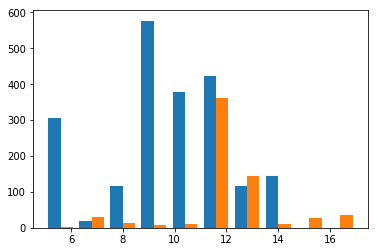

In [21]:
plt.hist([all_average_lmc['MY_NVISITS'], all_average_smc['MY_NVISITS']])

In [24]:
len(all_average_lmc), len(all_average_smc)


(2080, 641)

### Start Here
Everything above this cell is just to make the simplified data table. This is where the likelihood stuff starts,

In [1]:
%run binary_detection.py
%run binary_params.py

%run jitter.py
%run rv_from_param.py
%run chi_sq_mean.py
%run second_reduce.py
%run table_convert.py

%run synthetic_galaxy.py
%run machine_error.py
%run error_with_jitter.py
%run binary_fraction.py

import pickle

In [2]:
lmc = pickle.load(open("/home/cody/Binary Search/all-average-lmc.pck", "rb" ) )

In [3]:
from astropy.io import fits
from astropy.table import Table

In [9]:
import datetime
import numpy as np
%run lnlikelihood.py
fractions = np.linspace(0, 1, 15)
a_range = [0,0.3,0.6]
b = 0.61
# lnlikelihood = np.zeros((len(fractions),len(a_range)))
all_likelihood = []
for m in range(len(a_range)):
    
    lmc_err_j = error_with_jitter(lmc['RADIAL_ERR'], a_range[m], 0.61, lmc['LOGG'])

    lmc_detection_rate_j = binary_fraction(lmc['RADIALV'], lmc_err_j)
    
    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(lmc_detection_rate_j,
                                50, 
                                lmc, 
                                fractions[n],
                                100*u.jupiterMass,
                                3, 2,
                                a_range[m],
                                0.61))
        print("Done with,", n)
    all_likelihood.append(lnl)

Done with, 0
Done with, 1
Done with, 2
Done with, 3
Done with, 4
Done with, 5
Done with, 6
Done with, 7
Done with, 8
Done with, 9
Done with, 10
Done with, 11
Done with, 12
Done with, 13
Done with, 14
Done with, 0
Done with, 1
Done with, 2
Done with, 3
Done with, 4
Done with, 5
Done with, 6
Done with, 7
Done with, 8
Done with, 9
Done with, 10
Done with, 11
Done with, 12
Done with, 13
Done with, 14
Done with, 0
Done with, 1
Done with, 2
Done with, 3
Done with, 4
Done with, 5
Done with, 6
Done with, 7
Done with, 8
Done with, 9
Done with, 10
Done with, 11
Done with, 12
Done with, 13
Done with, 14


Text(0, 0.5, 'Likelihood')

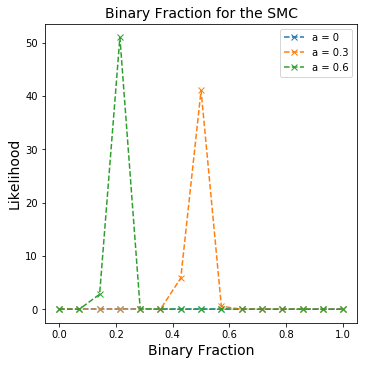

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5.6,5.5))
for n in range(len(all_likelihood)):
    plt.plot(fractions[:], np.exp(np.array(all_likelihood[n][:])), 'x--',label = 'a = {}'.format(a_range[n]),)  
plt.legend()
plt.title("Binary Fraction for the SMC", size = 14)
plt.xlabel("Binary Fraction", size = 14)
plt.ylabel('Likelihood', size = 14)

In [11]:
all_likelihood

[[-4057.875963126301,
  -2885.01924253143,
  -1510.821904186413,
  -1500.3583717844604,
  -1173.8344133370733,
  -643.122059040406,
  -785.1232887067172,
  -534.3837937359882,
  -228.4082792944699,
  -231.60073443609696,
  -151.31739783337116,
  -102.85462557050643,
  -64.18121768294064,
  -61.7568873779548,
  -18.734706310597787],
 [-385.4579687102444,
  -319.0634538656274,
  -122.9574012053269,
  -112.02626437022423,
  -33.43287979197865,
  -7.715664708532005,
  1.766700661688918,
  3.715148547633914,
  -0.5874440578643947,
  -10.75874716069941,
  -22.432963157921648,
  -37.12875807162752,
  -57.902798036811575,
  -80.45100274488648,
  -129.72895219002734],
 [-49.74087085655505,
  -12.651791288753078,
  1.0303933679039097,
  3.9320441797512564,
  -2.5440531676044182,
  -11.24583438718858,
  -31.91376031762951,
  -40.72221342209227,
  -62.980418446582235,
  -70.25223423718158,
  -83.19608833509909,
  -121.85697092579176,
  -93.97490647268056,
  -192.03377777008092,
  -227.533451579882

In [8]:
import pickle
lmc = pickle.load(open("/home/cody/Binary Search/all-average-lmc.pck", "rb" ) )

In [9]:
%run likelihood_no_mcmc.py
from multiprocessing import Pool
aa = [0.8, 0.6, 0.4, 0.2, 0]
pool = Pool()
answer = pool.map(lnlh, aa)

Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 2
Done with, 2
Done with, 2
Done with, 2
Done with, 2
Done with, 3
Done with, 3
Done with, 3
Done with, 3
Done with, 4
Done with, 3
Done with, 4
Done with, 4
Done with, 4
Done with, 5
Done with, 4
Done with, 5
Done with, 5
Done with, 5
Done with, 6
Done with, 5
Done with, 6
Done with, 6
Done with, 7
Done with, 6
Done with, 6
Done with, 7
Done with, 7
Done with, 7
Done with, 8
Done with, 7
Done with, 8
Done with, 8
Done with, 8
Done with, 8
Done with, 9
Done with, 9
Done with, 9
Done with, 9
Done with, 9
Done with, 10
Done with, 10
Done with, 10
Done with, 10
Done with, 11
Done with, 10
Done with, 11
Done with, 11
Done with, 11
Done with, 12
Done with, 12
Done with, 11
Done with, 12
Done with, 12
Done with, 13
Done with, 13
Done with, 12
Done with, 13
Done with, 13
Done with, 14
Done with, 13
Done with, 14
Done with, 14
Done with, 14
Done with, 15


In [12]:
answer

[[-102.88176546137841,
  -142.97989352650475,
  -76.33593138326778,
  -55.12090302412533,
  -46.42806263583848,
  -50.80503658585675,
  -41.86032018352555,
  -39.16465913595008,
  -36.069140541252104,
  -20.640408174094276,
  -22.59192869228756,
  -17.90097697020011,
  -14.915460257467313,
  -9.385949754456771,
  -11.143618621815126,
  -8.430429733906067,
  -4.918323456861634,
  -2.665244815406748,
  -1.9979967437526827,
  -0.41227888850995376,
  0.34019642989170196,
  1.0393498568596629,
  1.7983083541737253,
  2.4305957237517095,
  2.926047580489432,
  3.2922909290167013,
  3.255867787054387,
  3.2000504685558284,
  3.0654633897251076,
  2.9193815317992025,
  2.2393545087292397,
  2.028187195457611,
  1.830146566984842,
  0.16098864668453716,
  0.38915909628223755,
  -0.7869565460697281,
  -2.6858960913301693,
  -2.7377197802239834,
  -4.676470116974495,
  -7.611985711563893,
  -6.095427724285857,
  -7.540070014772176,
  -12.433257251753767,
  -10.78829850585051,
  -9.966543792639955

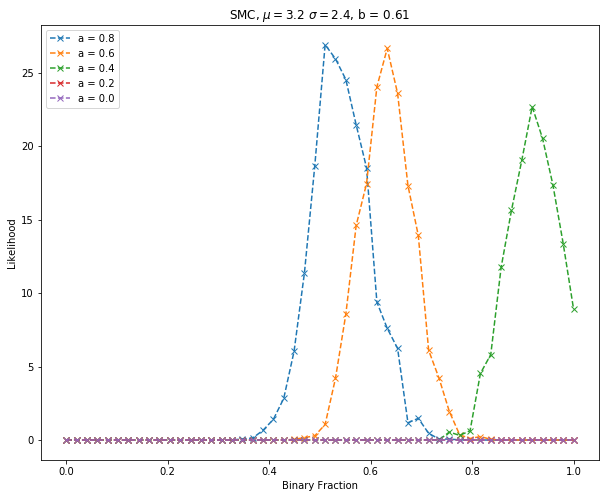

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,8))
plt.plot(np.linspace(0,1,50),np.exp(answer[0]), 'x--', label = 'a = 0.8')
plt.plot(np.linspace(0,1,50),np.exp(answer[1]), 'x--', label = 'a = 0.6')
plt.plot(np.linspace(0,1,50),np.exp(answer[2]), 'x--', label = 'a = 0.4')
plt.plot(np.linspace(0,1,50),np.exp(answer[3]), 'x--', label = 'a = 0.2')
plt.plot(np.linspace(0,1,50),np.exp(answer[4]), 'x--', label = 'a = 0.0')
plt.legend()
plt.title('SMC, $\mu = 3.2$ $\sigma = 2.4$, b = 0.61')
plt.xlabel("Binary Fraction")
plt.ylabel("Likelihood")
fig.savefig("smc-likelihood-figure-50.pdf")
plt.show()

In [ ]:
%run likelihood_no_mcmc.py
from multiprocessing import Pool
aa = [0.8, 0.6, 0.4, 0.2, 0]
pool = Pool()
answer_smc = pool.map(lnlh, aa)

Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 2
Done with, 2
Done with, 2
Done with, 2
Done with, 3
Done with, 3
Done with, 2
Done with, 3
Done with, 3
Done with, 4
Done with, 3
Done with, 4
Done with, 4
Done with, 4
Done with, 5
Done with, 4
Done with, 5
Done with, 5
Done with, 6
Done with, 5
Done with, 5
Done with, 6
Done with, 6
Done with, 7
Done with, 6
Done with, 7
Done with, 7
Done with, 6
Done with, 8
Done with, 8
Done with, 8
Done with, 7
Done with, 7
Done with, 9
Done with, 9
Done with, 8
Done with, 8
Done with, 9
Done with, 10
Done with, 9
Done with, 10
Done with, 9
Done with, 11
Done with, 10
Done with, 10
Done with, 10
Done with, 11
Done with, 11
Done with, 11
Done with, 12
Done with, 12
Done with, 11
Done with, 12
Done with, 13
Done with, 12
Done with, 13
Done with, 13
Done with, 12
Done with, 14
Done with, 14
Done with, 14
Done with, 13
Done with, 15
Done with, 13
Done with, 15


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,8))
bf = np.linspace(0,1,50)
plt.plot(bf,np.exp(answer_smc[0]), 'x--', label = 'a = 0.8')
plt.plot(bf,np.exp(answer_smc[1]), 'x--', label = 'a = 0.6')
plt.plot(bf,np.exp(answer_smc[2]), 'x--', label = 'a = 0.4')
plt.plot(bf,np.exp(answer_smc[3]), 'x--', label = 'a = 0.2')
plt.plot(bf,np.exp(answer_smc[4]), 'x--', label = 'a = 0.0')
plt.legend()
plt.title('LMC, $\mu = 3$ $\sigma = 2.4$, b = 0.6')
plt.xlabel("Binary Fraction")
plt.ylabel("Likelihood")
fig.savefig("lmc-likelihood-figure-50.pdf")

# Feb 11
I want to try and see what happens when I start picking a specific range of logg values and other paramiters

In [1]:
%run synthetic_fractions.py

In [44]:
import pickle
import numpy as np
smc = pickle.load(open("/home/cody/Binary Search/all-average-smc.pck", "rb" ) )
lmc = pickle.load(open("/home/cody/Binary Search/all-average-lmc.pck", "rb" ) )

([array([0.19513057, 0.58963363, 0.83142577, 0.4878265 , 0.28845384,
         0.13998495, 0.04241968, 0.02120985, 0.06362952, 0.05938756]),
  array([0.40917257, 0.80135069, 0.81573049, 0.42093799, 0.16602207,
         0.04444685, 0.03398877, 0.01830166, 0.00915082, 0.        ])],
 array([6.8326294e-04, 3.6845174e-01, 7.3622024e-01, 1.1039888e+00,
        1.4717572e+00, 1.8395257e+00, 2.2072942e+00, 2.5750628e+00,
        2.9428310e+00, 3.3105996e+00, 3.6783681e+00], dtype=float32),
 <a list of 2 Lists of Patches objects>)

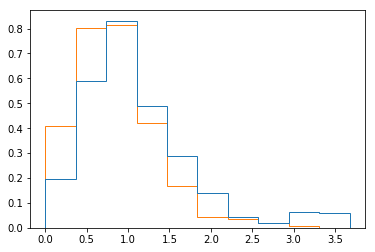

In [45]:
import matplotlib.pyplot as plt
plt.hist([smc['LOGG'], lmc['LOGG']], histtype='step', density= True)

In [46]:
f = 0.6
s = 1.0
smc_smallg = smc[smc["LOGG"] < f]
smc_midg = smc[np.logical_and(smc["LOGG"] < s, smc['LOGG'] > f)]
smc_largeg = smc[smc['LOGG'] > s]
lmc_smallg = lmc[lmc["LOGG"] < f]
lmc_midg = lmc[np.logical_and(lmc["LOGG"] < s, lmc['LOGG'] > f)]
lmc_largeg = lmc[lmc['LOGG'] > s]

In [37]:
print(len(smc_smallg), len(smc_midg), len(smc_largeg))
print(len(lmc_smallg), len(lmc_midg), len(lmc_largeg))

130 202 309
717 671 692


In [6]:
lmc_err_j_total = error_with_jitter(lmc['RADIAL_ERR'], 0.3, 0.61, lmc['LOGG'])
lmc_detection_rate_j_total = binary_fraction(lmc['RADIALV'], lmc_err_j_total)

smc_err_j_total = error_with_jitter(smc['RADIAL_ERR'], 0.3, 0.61, smc['LOGG'])
smc_detection_rate_j_total = binary_fraction(smc['RADIALV'], smc_err_j_total)

In [7]:
import astropy.units as u
mu = 3
sigma = 2.4
a = 0.3
b = 0.61
lmc_syn_list1_total = synthetic_fractions(30, lmc, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
lmc_syn_list0_total = synthetic_fractions(30, lmc, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)

smc_syn_list1_total = synthetic_fractions(30, smc, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
smc_syn_list0_total = synthetic_fractions(30, smc, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)

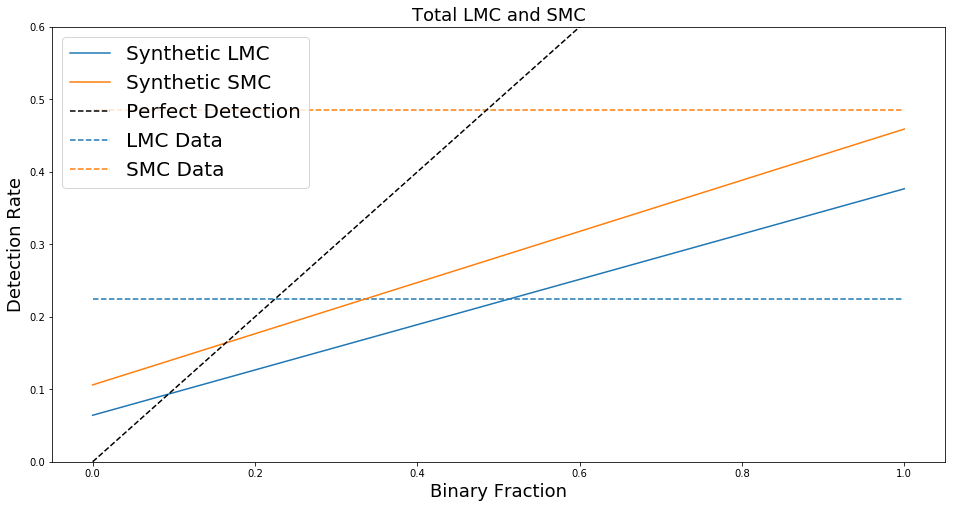

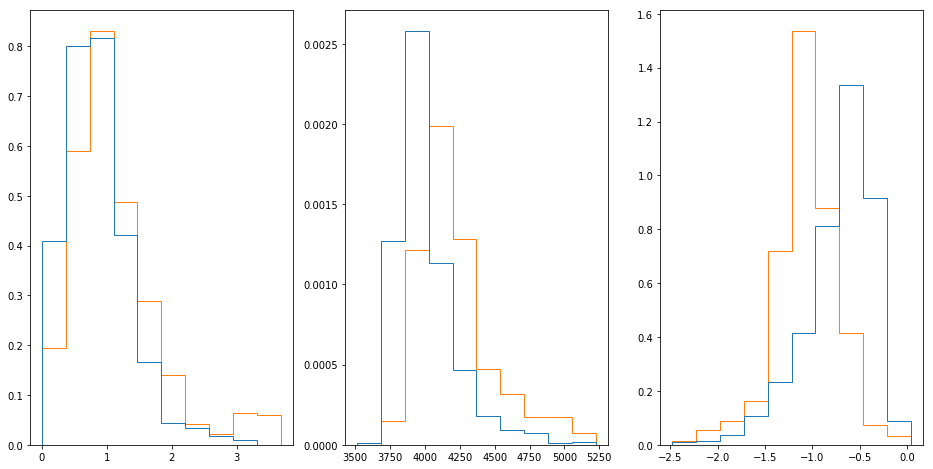

In [8]:
fig = plt.figure(figsize = (16,8))
plt.plot([0,1], [np.mean(lmc_syn_list0_total), np.mean(lmc_syn_list1_total)], label = 'Synthetic LMC')
plt.plot([0,1], [np.mean(smc_syn_list0_total), np.mean(smc_syn_list1_total)], label = 'Synthetic SMC')
plt.hlines(lmc_detection_rate_j_total, 0, 1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.hlines(smc_detection_rate_j_total, 0, 1, color = 'C1', linestyles='dashed', label = 'SMC Data')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('Total LMC and SMC', size = 18)
plt.ylim(0,0.6)
plt.legend(prop = {'size': 20}, loc = 2)
plt.show()

fig2, ax = plt.subplots(1,3, figsize = (16,8))
ax[0].hist([lmc['LOGG'], smc['LOGG']], histtype='step', density = True)
ax[1].hist([lmc['TEFF'], smc['TEFF']], histtype='step', density = True)
ax[2].hist([lmc['FE_H'], smc['FE_H']], histtype='step', density = True)
plt.show()

Do this again, but only using low logg stars

In [9]:
mu = 3
sigma = 2.4
a = 0.3
b = 0.61
lmc_err_j_small = error_with_jitter(lmc_smallg['RADIAL_ERR'], a, b, lmc_smallg['LOGG'])
lmc_detection_rate_j_small = binary_fraction(lmc_smallg['RADIALV'], lmc_err_j_small)

smc_err_j_small = error_with_jitter(smc_smallg['RADIAL_ERR'], a, b, smc_smallg['LOGG'])
smc_detection_rate_j_small = binary_fraction(smc_smallg['RADIALV'], smc_err_j_small)


lmc_syn_list1_small = synthetic_fractions(30, lmc_smallg, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
lmc_syn_list0_small = synthetic_fractions(30, lmc_smallg, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
lmc_syn_list05_small = synthetic_fractions(30, lmc_smallg, 0.5, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)

smc_syn_list1_small = synthetic_fractions(30, smc_smallg, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
smc_syn_list0_small = synthetic_fractions(30, smc_smallg, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
smc_syn_list05_small = synthetic_fractions(30, smc_smallg, 0.5, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)


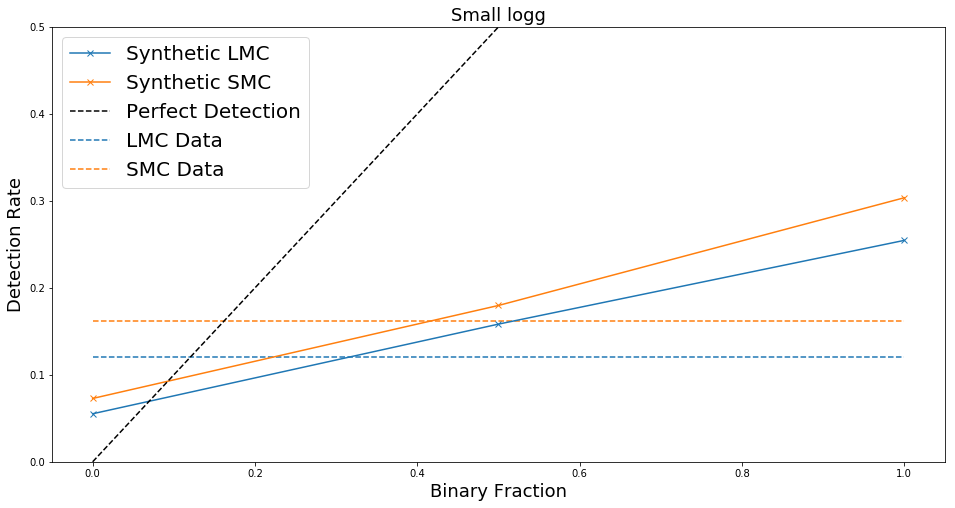

([array([0.93109419, 0.55865651, 0.97764878, 0.83798487, 1.74580182,
         1.90874285, 2.5605087 , 2.32773634, 2.53723135, 2.30445783]),
  array([0.38515069, 0.51353426, 0.77030129, 0.38515074, 1.79737012,
         1.28383548, 2.95282161, 3.72312475, 2.56767096, 2.31090387])],
 array([0.00068326, 0.06059987, 0.12051648, 0.1804331 , 0.2403497 ,
        0.3002663 , 0.3601829 , 0.42009953, 0.4800161 , 0.5399327 ,
        0.59984934], dtype=float32),
 <a list of 2 Lists of Patches objects>)

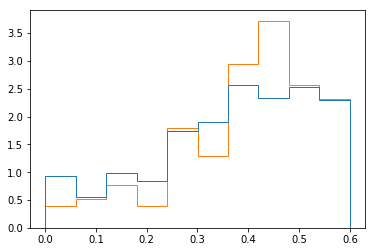

In [10]:
fig = plt.figure(figsize = (16,8))
plt.plot([0,0.5,1],
         [np.mean(lmc_syn_list0_small),np.mean(lmc_syn_list05_small), np.mean(lmc_syn_list1_small)],
         'x-' ,
         label = 'Synthetic LMC')
plt.plot([0,0.5,1],
         [np.mean(smc_syn_list0_small),np.mean(smc_syn_list05_small), np.mean(smc_syn_list1_small)],
         'x-',
         label = 'Synthetic SMC')
plt.hlines(lmc_detection_rate_j_small, 0, 1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.hlines(smc_detection_rate_j_small, 0, 1, color = 'C1', linestyles='dashed', label = 'SMC Data')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('Small logg', size = 18)
plt.ylim(0,0.5)
plt.legend(prop = {'size': 20}, loc = 2)
plt.show()

plt.hist([lmc_smallg["LOGG"], smc_smallg['LOGG']], histtype = 'step', density = True)

Again, now with middle g

In [11]:
Using the program \textit{emcee} developed by Dan Foreman-Mackey \cite{emcee} we can use and MCMC approuch to try a large range of parametersmu = 3
sigma = 2.4
a = 0.3
b = 0.61
lmc_err_j_mid = error_with_jitter(lmc_midg['RADIAL_ERR'], a, b, lmc_midg['LOGG'])
lmc_detection_rate_j_mid = binary_fraction(lmc_midg['RADIALV'], lmc_err_j_mid)

smc_err_j_mid = error_with_jitter(smc_midg['RADIAL_ERR'], a, b, smc_midg['LOGG'])
smc_detection_rate_j_mid = binary_fraction(smc_midg['RADIALV'], smc_err_j_mid)


lmc_syn_list1_mid = synthetic_fractions(30, lmc_midg, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
lmc_syn_list0_mid = synthetic_fractions(30, lmc_midg, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
lmc_syn_list05_mid = synthetic_fractions(30, lmc_midg, 0.5, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)

smc_syn_list1_mid = synthetic_fractions(30, smc_midg, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
smc_syn_list0_mid = synthetic_fractions(30, smc_midg, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
smc_syn_list05_mid = synthetic_fractions(30, smc_midg, 0.5, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)


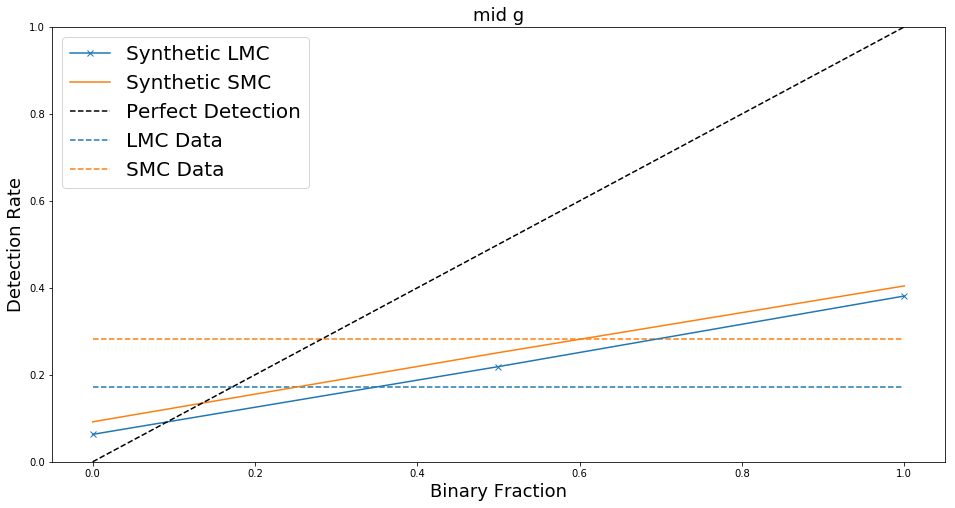

([array([2.3877515 , 1.97735966, 2.3877515 , 2.20120841, 2.35044288,
         2.94738516, 2.6116032 , 2.76083767, 2.46237241, 2.94738076]),
  array([2.72648419, 1.48717542, 2.1068287 , 2.35469089, 2.60255309,
         2.35469441, 3.09827749, 3.47007079, 2.47862569, 2.35469089])],
 array([0.6000658 , 0.64001137, 0.67995685, 0.7199024 , 0.75984794,
        0.7997935 , 0.83973897, 0.8796845 , 0.91963005, 0.95957553,
        0.9995211 ], dtype=float32),
 <a list of 2 Lists of Patches objects>)

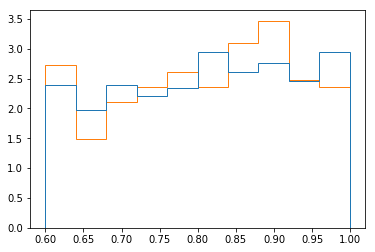

In [12]:
fig = plt.figure(figsize = (16,8))
plt.plot([0,0.5,1],
         [np.mean(lmc_syn_list0_mid),np.mean(lmc_syn_list05_mid), np.mean(lmc_syn_list1_mid)],
         'x-' ,
         label = 'Synthetic LMC')
plt.plot([0,0.5,1],
         [np.mean(smc_syn_list0_mid),np.mean(smc_syn_list05_mid), np.mean(smc_syn_list1_mid)],
         label = 'Synthetic SMC')
plt.hlines(lmc_detection_rate_j_mid, 0, 1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.hlines(smc_detection_rate_j_mid, 0, 1, color = 'C1', linestyles='dashed', label = 'SMC Data')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('mid g', size = 18)
plt.ylim(0,1)
plt.legend(prop = {'size': 20}, loc = 2)
plt.show()

plt.hist([lmc_midg["LOGG"], smc_midg['LOGG']], histtype = 'step', density = True)

Again with large g. (small jitter)

In [13]:
mu = 3
sigma = 2.4
a = 0.3
b = 0.61
lmc_err_j_large = error_with_jitter(lmc_largeg['RADIAL_ERR'], a, b, lmc_largeg['LOGG'])
lmc_detection_rate_j_large = binary_fraction(lmc_largeg['RADIALV'], lmc_err_j_large)

smc_err_j_large = error_with_jitter(smc_largeg['RADIAL_ERR'], a, b, smc_largeg['LOGG'])
smc_detection_rate_j_large = binary_fraction(smc_largeg['RADIALV'], smc_err_j_large)


lmc_syn_list1_large = synthetic_fractions(50, lmc_largeg, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
lmc_syn_list0_large = synthetic_fractions(50, lmc_largeg, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
lmc_syn_list05_large = synthetic_fractions(50, lmc_largeg, 0.5, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)

smc_syn_list1_large = synthetic_fractions(50, smc_largeg, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
smc_syn_list0_large = synthetic_fractions(50, smc_largeg, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
smc_syn_list05_large = synthetic_fractions(50, smc_largeg, 0.5, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)


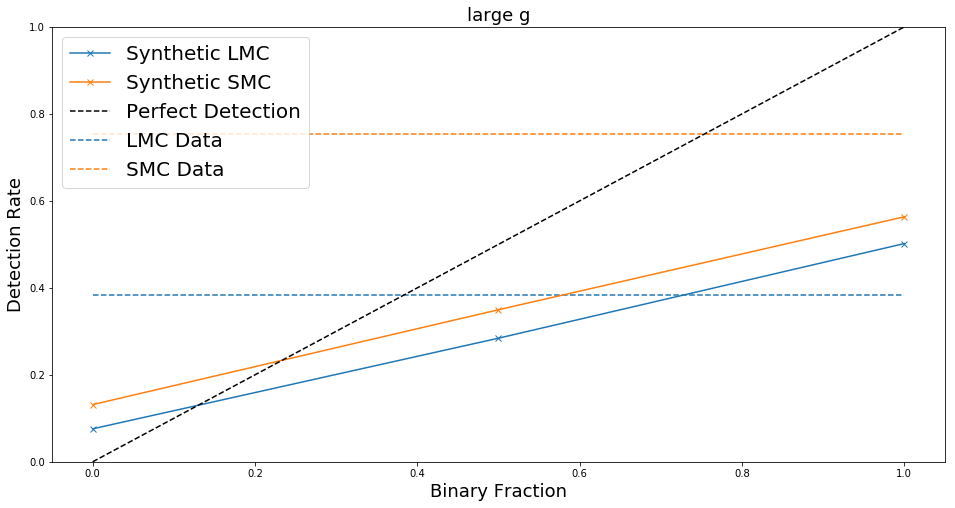

([array([1.89393205, 0.89031034, 0.48022779, 0.17806199, 0.10791636,
         0.07554145, 0.06474987, 0.01618745, 0.02697909, 0.        ]),
  array([1.31713834, 0.76128213, 0.68877876, 0.33834746, 0.18125757,
         0.03625151, 0.06041924, 0.08458687, 0.15708989, 0.10875454])],
 array([1.0002078, 1.2680238, 1.5358398, 1.8036559, 2.071472 , 2.339288 ,
        2.607104 , 2.87492  , 3.142736 , 3.410552 , 3.678368 ],
       dtype=float32),
 <a list of 2 Lists of Patches objects>)

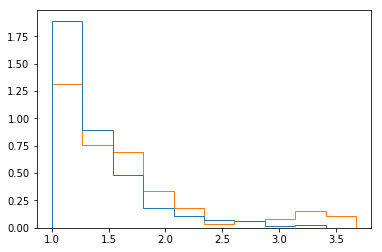

In [14]:
fig = plt.figure(figsize = (16,8))
plt.plot([0,0.5,1],
         [np.mean(lmc_syn_list0_large),
          np.mean(lmc_syn_list05_large),
          np.mean(lmc_syn_list1_large)],
         'x-',
         label = 'Synthetic LMC')
plt.plot([0,0.5,1],
         [np.mean(smc_syn_list0_large),
          np.mean(smc_syn_list05_large),
          np.mean(smc_syn_list1_large)],
         'x-',
         label = 'Synthetic SMC')
plt.hlines(lmc_detection_rate_j_large, 0, 1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.hlines(smc_detection_rate_j_large, 0, 1, color = 'C1', linestyles='dashed', label = 'SMC Data')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('large g', size = 18)
plt.ylim(0,1)
plt.legend(prop = {'size': 20}, loc = 2)
plt.show()

plt.hist([lmc_largeg["LOGG"], smc_largeg['LOGG']], histtype = 'step', density = True)

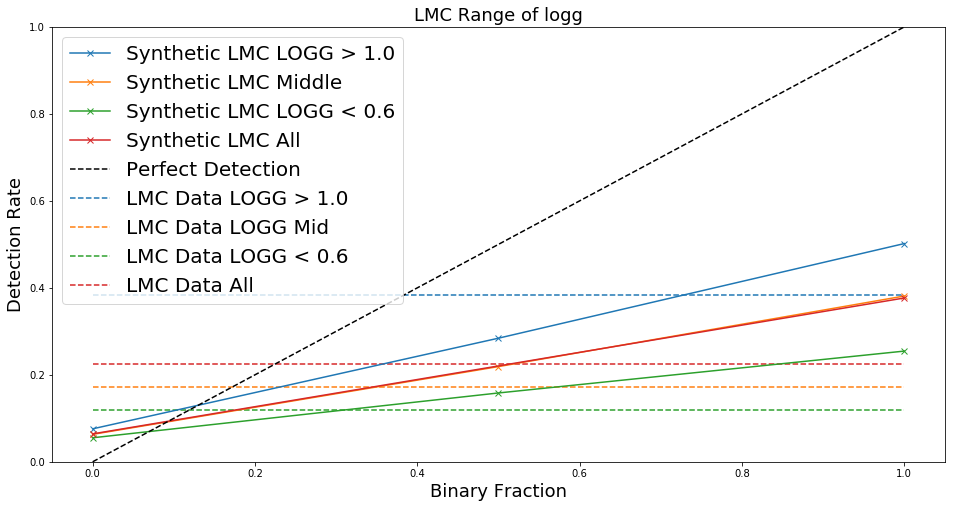

([array([1.89393205, 0.89031034, 0.48022779, 0.17806199, 0.10791636,
         0.07554145, 0.06474987, 0.01618745, 0.02697909, 0.        ]),
  array([1.31713834, 0.76128213, 0.68877876, 0.33834746, 0.18125757,
         0.03625151, 0.06041924, 0.08458687, 0.15708989, 0.10875454])],
 array([1.0002078, 1.2680238, 1.5358398, 1.8036559, 2.071472 , 2.339288 ,
        2.607104 , 2.87492  , 3.142736 , 3.410552 , 3.678368 ],
       dtype=float32),
 <a list of 2 Lists of Patches objects>)

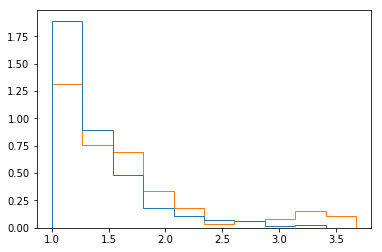

In [28]:
fig = plt.figure(figsize = (16,8))
plt.plot([0,0.5,1],
         [np.mean(lmc_syn_list0_large),
          np.mean(lmc_syn_list05_large),
          np.mean(lmc_syn_list1_large)],
         'x-',
         label = 'Synthetic LMC LOGG > {}'.format(s))
plt.plot([0,0.5,1],
         [np.mean(lmc_syn_list0_mid),
          np.mean(lmc_syn_list05_mid),
          np.mean(lmc_syn_list1_mid)],
         'x-',
         label = 'Synthetic LMC Middle')

plt.plot([0,0.5,1],
         [np.mean(lmc_syn_list0_small),
          np.mean(lmc_syn_list05_small),
          np.mean(lmc_syn_list1_small)],
         'x-',
         label = 'Synthetic LMC LOGG < {}'.format(f))
plt.plot([0,1],
         [np.mean(lmc_syn_list0_total),
          np.mean(lmc_syn_list1_total)],
         'x-',
         label = 'Synthetic LMC All')

plt.hlines(lmc_detection_rate_j_large, 0, 1, color = 'C0', linestyles='dashed', label = 'LMC Data LOGG > {}'.format(s))
plt.hlines(lmc_detection_rate_j_mid, 0, 1, color = 'C1', linestyles='dashed', label = 'LMC Data LOGG Mid')
plt.hlines(lmc_detection_rate_j_small, 0, 1, color = 'C2', linestyles='dashed', label = 'LMC Data LOGG < {}'.format(f))
plt.hlines(lmc_detection_rate_j_total, 0, 1, color = 'C3', linestyles='dashed', label = 'LMC Data All')


plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('LMC Range of logg', size = 18)
plt.ylim(0,1)
plt.legend(prop = {'size': 20}, loc = 2)
plt.show()

plt.hist([lmc_largeg["LOGG"], smc_largeg['LOGG']], histtype = 'step', density = True)

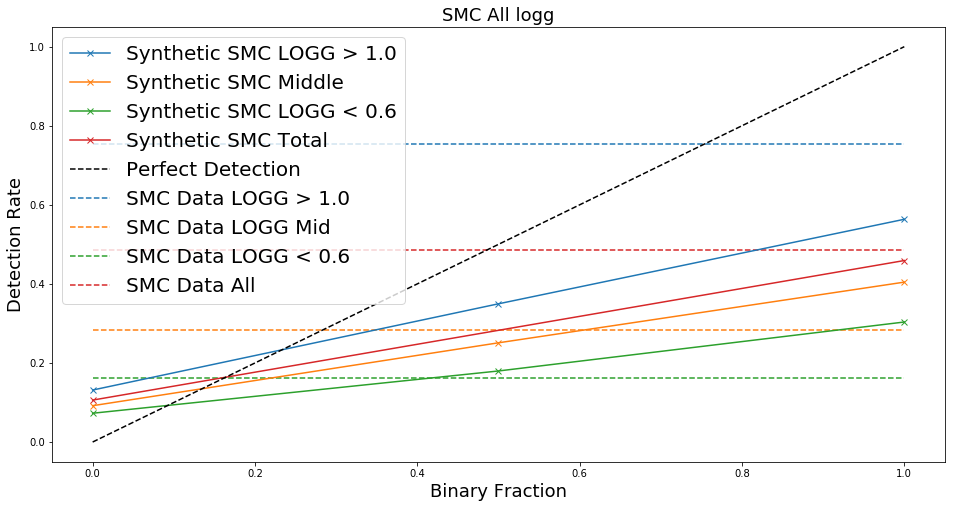

([array([1.89393205, 0.89031034, 0.48022779, 0.17806199, 0.10791636,
         0.07554145, 0.06474987, 0.01618745, 0.02697909, 0.        ]),
  array([1.31713834, 0.76128213, 0.68877876, 0.33834746, 0.18125757,
         0.03625151, 0.06041924, 0.08458687, 0.15708989, 0.10875454])],
 array([1.0002078, 1.2680238, 1.5358398, 1.8036559, 2.071472 , 2.339288 ,
        2.607104 , 2.87492  , 3.142736 , 3.410552 , 3.678368 ],
       dtype=float32),
 <a list of 2 Lists of Patches objects>)

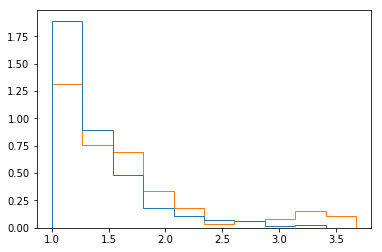

In [32]:
fig = plt.figure(figsize = (16,8))
plt.plot([0,0.5,1],
         [np.mean(smc_syn_list0_large),
          np.mean(smc_syn_list05_large),
          np.mean(smc_syn_list1_large)],
         'x-',
         label = 'Synthetic SMC LOGG > {}'.format(s))
plt.plot([0,0.5,1],
         [np.mean(smc_syn_list0_mid),
          np.mean(smc_syn_list05_mid),
          np.mean(smc_syn_list1_mid)],
         'x-',
         label = 'Synthetic SMC Middle')

plt.plot([0,0.5,1],
         [np.mean(smc_syn_list0_small),
          np.mean(smc_syn_list05_small),
          np.mean(smc_syn_list1_small)],
         'x-',
         label = 'Synthetic SMC LOGG < {}'.format(f))

plt.plot([0, 1],
         [np.mean(smc_syn_list0_total),
          np.mean(smc_syn_list1_total)],
         'x-',
         label = 'Synthetic SMC Total')

plt.hlines(smc_detection_rate_j_large, 0, 1, color = 'C0', linestyles='dashed', label = 'SMC Data LOGG > {}'.format(s))
plt.hlines(smc_detection_rate_j_mid, 0, 1, color = 'C1', linestyles='dashed', label = 'SMC Data LOGG Mid')
plt.hlines(smc_detection_rate_j_small, 0, 1, color = 'C2', linestyles='dashed', label = 'SMC Data LOGG < {}'.format(f))
plt.hlines(smc_detection_rate_j_total, 0, 1, color = 'C3', linestyles='dashed', label = 'SMC Data All')


plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('SMC All logg', size = 18)

plt.legend(prop = {'size': 20}, loc = 2)
plt.show()

plt.hist([lmc_largeg["LOGG"], smc_largeg['LOGG']], histtype = 'step', density = True)

What if I just make the distribution for SMC and LMC as similar as I can.

In [17]:
%run same_dat.py

In [18]:
lmc_sim, smc_sim = same_dat(lmc, smc, temp_lim=1000, logg_lim=0.01, feh_lim=1)

([array([  1.,   6.,  12.,  20.,  42.,  63., 112., 199., 121.,  14.]),
  array([  3.,  15.,  16.,  37., 179., 200., 100.,  39.,   1.,   0.])],
 array([-2.2776258 , -2.0460975 , -1.8145692 , -1.583041  , -1.3515127 ,
        -1.1199844 , -0.8884561 , -0.6569278 , -0.42539957, -0.19387127,
         0.037657  ], dtype=float32),
 <a list of 2 Lists of Patches objects>)

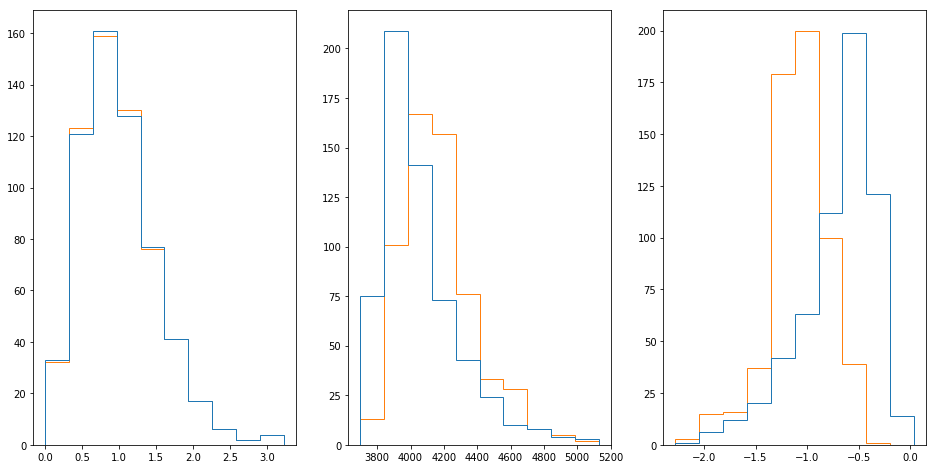

In [19]:
fig2, ax = plt.subplots(1,3, figsize = (16,8))
ax[0].hist([lmc_sim['LOGG'], smc_sim['LOGG']], histtype='step',)
ax[1].hist([lmc_sim['TEFF'], smc_sim['TEFF']], histtype='step',)
ax[2].hist([lmc_sim['FE_H'], smc_sim['FE_H']], histtype='step',)

In [20]:
mu = 3
sigma = 2.4
a = 0.3
b = 0.61
lmc_err_j = error_with_jitter(lmc_sim['RADIAL_ERR'], a, b, lmc_sim['LOGG'])
lmc_detection_rate_j = binary_fraction(lmc_sim['RADIALV'], lmc_err_j)

smc_err_j = error_with_jitter(smc_sim['RADIAL_ERR'], a, b, smc_sim['LOGG'])
smc_detection_rate_j = binary_fraction(smc_sim['RADIALV'], smc_err_j)


lmc_syn_list1 = synthetic_fractions(10, lmc_sim, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
lmc_syn_list0 = synthetic_fractions(10, lmc_sim, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
lmc_syn_list05 = synthetic_fractions(10, lmc_sim, 0.5, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)

smc_syn_list1 = synthetic_fractions(10, smc_sim, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
smc_syn_list0 = synthetic_fractions(10, smc_sim, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
smc_syn_list05 = synthetic_fractions(10, smc_sim, 0.5, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)


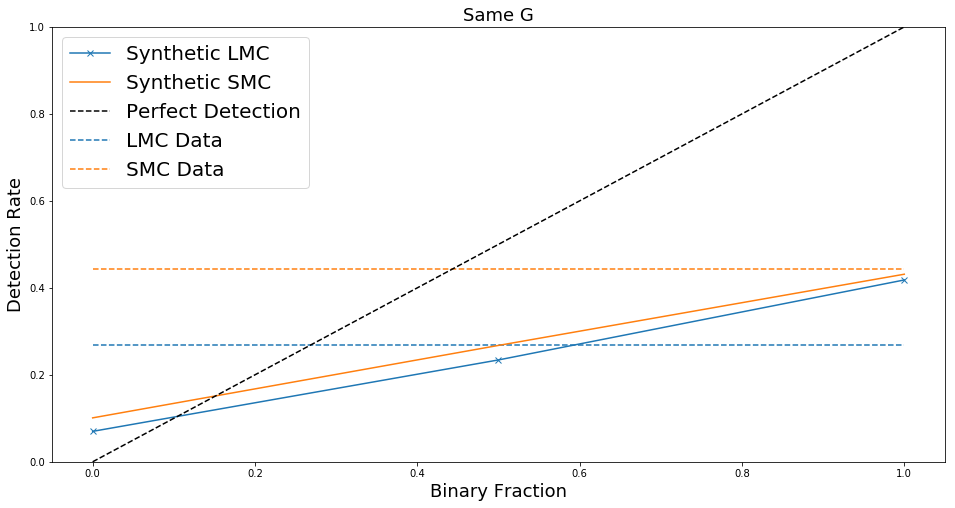

([array([  1.,   6.,  12.,  20.,  42.,  63., 112., 199., 121.,  14.]),
  array([  3.,  15.,  16.,  37., 179., 200., 100.,  39.,   1.,   0.])],
 array([-2.2776258 , -2.0460975 , -1.8145692 , -1.583041  , -1.3515127 ,
        -1.1199844 , -0.8884561 , -0.6569278 , -0.42539957, -0.19387127,
         0.037657  ], dtype=float32),
 <a list of 2 Lists of Patches objects>)

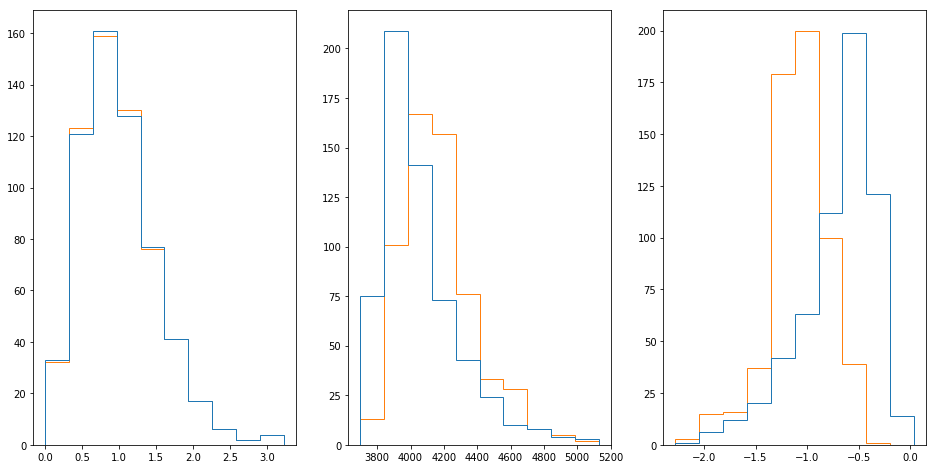

In [21]:
fig = plt.figure(figsize = (16,8))
plt.plot([0,0.5,1], [np.mean(lmc_syn_list0),np.mean(lmc_syn_list05), np.mean(lmc_syn_list1)],'x-' ,label = 'Synthetic LMC')
plt.plot([0,0.5,1], [np.mean(smc_syn_list0),np.mean(smc_syn_list05), np.mean(smc_syn_list1)], label = 'Synthetic SMC')
plt.hlines(lmc_detection_rate_j, 0, 1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.hlines(smc_detection_rate_j, 0, 1, color = 'C1', linestyles='dashed', label = 'SMC Data')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('Same G', size = 18)
plt.ylim(0,1)
plt.legend(prop = {'size': 20}, loc = 2)
plt.show()

fig2, ax = plt.subplots(1,3, figsize = (16,8))
ax[0].hist([lmc_sim['LOGG'], smc_sim['LOGG']], histtype='step',)
ax[1].hist([lmc_sim['TEFF'], smc_sim['TEFF']], histtype='step',)
ax[2].hist([lmc_sim['FE_H'], smc_sim['FE_H']], histtype='step',)

(array([1.26335547e-01, 1.10020214e+00, 1.35937049e+00, 9.55096737e-01,
        5.55154490e-01, 4.88738088e-01, 2.07190297e-01, 6.42506497e-02,
        7.65232457e-02, 2.95986139e-02, 2.16575224e-03, 2.16575224e-03,
        7.21917413e-04, 1.44383483e-03, 1.44383483e-03, 7.21917413e-04,
        0.00000000e+00, 7.21917413e-04, 0.00000000e+00, 7.21917413e-04,
        2.16575224e-03, 7.21917413e-04, 7.21917413e-04, 0.00000000e+00,
        7.21917413e-04, 0.00000000e+00, 7.21917413e-04, 7.21917413e-04,
        0.00000000e+00, 7.21917413e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.21917413e-04, 0.00000000e+00, 0.00000000e+00,
        2.16575224e-03, 0.00000000e+00, 0.00000000e+00, 7.21917413e-04,
        0.00000000e+00, 0.00000000e+00, 7.21917413e-04, 0.00000000e+00,
        7.21917413e-04, 0.00000000e+00, 0.00000000e+00, 7.21917413e-04,
        0.00000000e+00, 7.21917413e-04, 1.44383483e-03, 0.00000000e+00,
        0.00000000e+00, 1.44383483e-03, 7.21917413e-04, 0.000000

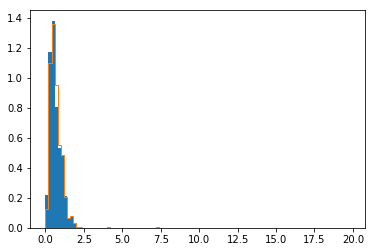

In [22]:
plt.hist([n for sublist in lmc_err_j for n in sublist], bins = np.arange(0,20, 0.2), density= True)
plt.hist([n for sublist in smc_err_j for n in sublist], bins = np.arange(0,20, 0.2), histtype='step', density=True)

In [23]:
np.mean([n for sublist in lmc_sim['RADIAL_ERR'] for n in sublist]),np.mean([n for sublist in smc_sim['RADIAL_ERR'] for n in sublist])

(0.16677451537699017, 0.3128641718800775)

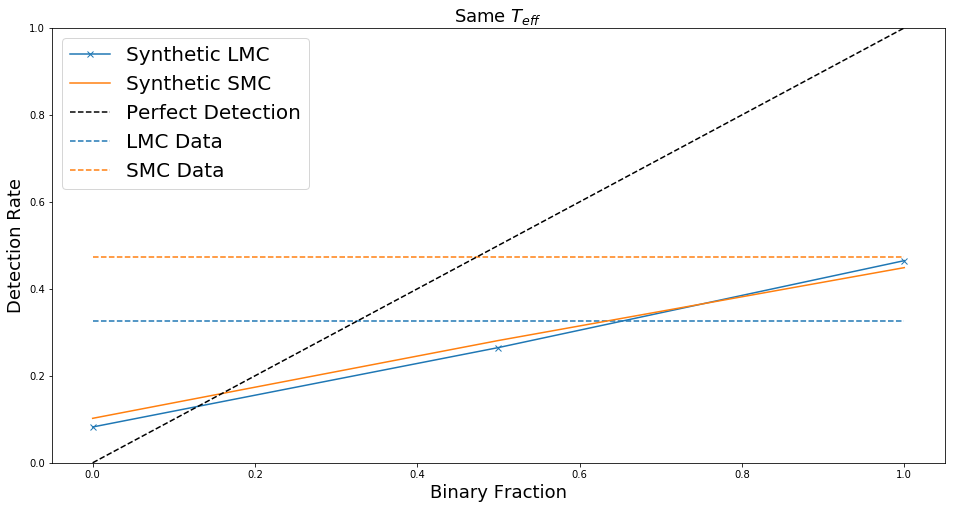

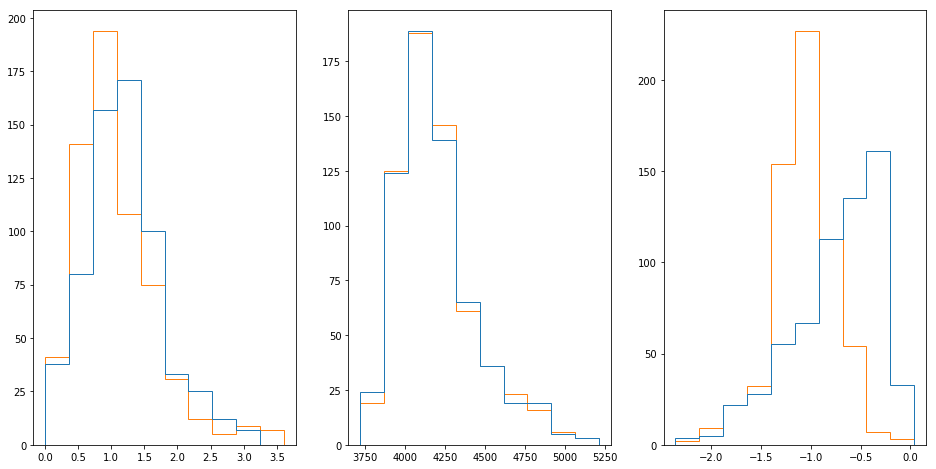

In [24]:
lmc_sim, smc_sim = same_dat(lmc, smc, temp_lim=50, logg_lim=2, feh_lim=2)
mu = 3
sigma = 2.4
a = 0.3
b = 0.61
lmc_err_j = error_with_jitter(lmc_sim['RADIAL_ERR'], a, b, lmc_sim['LOGG'])
lmc_detection_rate_j = binary_fraction(lmc_sim['RADIALV'], lmc_err_j)

smc_err_j = error_with_jitter(smc_sim['RADIAL_ERR'], a, b, smc_sim['LOGG'])
smc_detection_rate_j = binary_fraction(smc_sim['RADIALV'], smc_err_j)


lmc_syn_list1 = synthetic_fractions(10, lmc_sim, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
lmc_syn_list0 = synthetic_fractions(10, lmc_sim, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
lmc_syn_list05 = synthetic_fractions(10, lmc_sim, 0.5, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)

smc_syn_list1 = synthetic_fractions(10, smc_sim, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
smc_syn_list0 = synthetic_fractions(10, smc_sim, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
smc_syn_list05 = synthetic_fractions(10, smc_sim, 0.5, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
fig = plt.figure(figsize = (16,8))
plt.plot([0,0.5,1], [np.mean(lmc_syn_list0),np.mean(lmc_syn_list05), np.mean(lmc_syn_list1)],'x-' ,label = 'Synthetic LMC')
plt.plot([0,0.5,1], [np.mean(smc_syn_list0),np.mean(smc_syn_list05), np.mean(smc_syn_list1)], label = 'Synthetic SMC')
plt.hlines(lmc_detection_rate_j, 0, 1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.hlines(smc_detection_rate_j, 0, 1, color = 'C1', linestyles='dashed', label = 'SMC Data')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('Same $T_{eff}$', size = 18)
plt.ylim(0,1)
plt.legend(prop = {'size': 20}, loc = 2)
plt.show()

fig2, ax = plt.subplots(1,3, figsize = (16,8))
ax[0].hist([lmc_sim['LOGG'], smc_sim['LOGG']], histtype='step',)
ax[1].hist([lmc_sim['TEFF'], smc_sim['TEFF']], histtype='step',)
ax[2].hist([lmc_sim['FE_H'], smc_sim['FE_H']], histtype='step',)
plt.show()

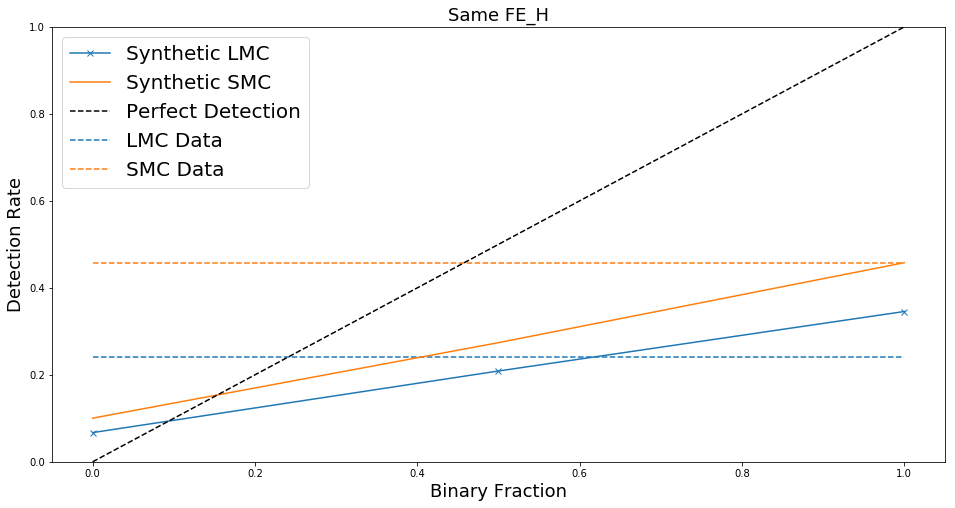

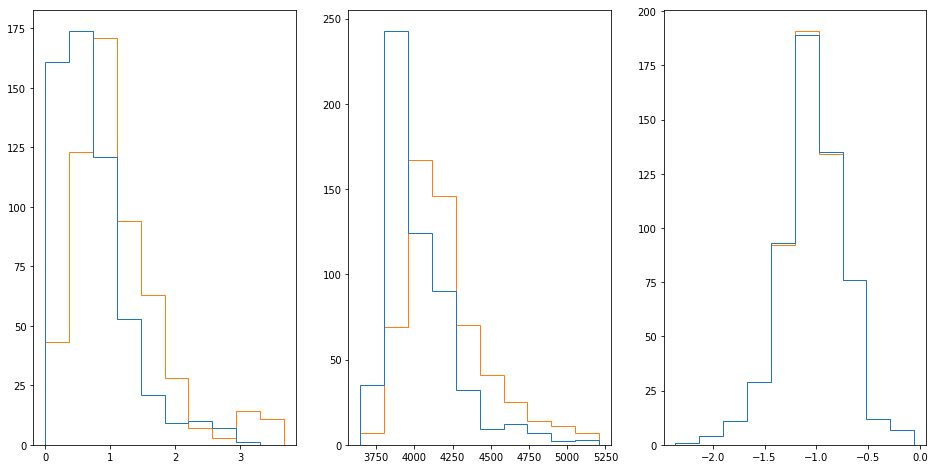

In [25]:
lmc_sim, smc_sim = same_dat(lmc, smc, temp_lim=1000, logg_lim=2, feh_lim=0.01)
mu = 3
sigma = 2.4
a = 0.3
b = 0.61
lmc_err_j = error_with_jitter(lmc_sim['RADIAL_ERR'], a, b, lmc_sim['LOGG'])
lmc_detection_rate_j = binary_fraction(lmc_sim['RADIALV'], lmc_err_j)

smc_err_j = error_with_jitter(smc_sim['RADIAL_ERR'], a, b, smc_sim['LOGG'])
smc_detection_rate_j = binary_fraction(smc_sim['RADIALV'], smc_err_j)


lmc_syn_list1 = synthetic_fractions(10, lmc_sim, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
lmc_syn_list0 = synthetic_fractions(10, lmc_sim, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
lmc_syn_list05 = synthetic_fractions(10, lmc_sim, 0.5, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)

smc_syn_list1 = synthetic_fractions(10, smc_sim, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
smc_syn_list0 = synthetic_fractions(10, smc_sim, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
smc_syn_list05 = synthetic_fractions(10, smc_sim, 0.5, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
fig = plt.figure(figsize = (16,8))
plt.plot([0,0.5,1], [np.mean(lmc_syn_list0),np.mean(lmc_syn_list05), np.mean(lmc_syn_list1)],'x-' ,label = 'Synthetic LMC')
plt.plot([0,0.5,1], [np.mean(smc_syn_list0),np.mean(smc_syn_list05), np.mean(smc_syn_list1)], label = 'Synthetic SMC')
plt.hlines(lmc_detection_rate_j, 0, 1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.hlines(smc_detection_rate_j, 0, 1, color = 'C1', linestyles='dashed', label = 'SMC Data')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('Same FE_H', size = 18)
plt.ylim(0,1)
plt.legend(prop = {'size': 20}, loc = 2)
plt.show()

fig2, ax = plt.subplots(1,3, figsize = (16,8))
ax[0].hist([lmc_sim['LOGG'], smc_sim['LOGG']], histtype='step',)
ax[1].hist([lmc_sim['TEFF'], smc_sim['TEFF']], histtype='step',)
ax[2].hist([lmc_sim['FE_H'], smc_sim['FE_H']], histtype='step',)
plt.show()

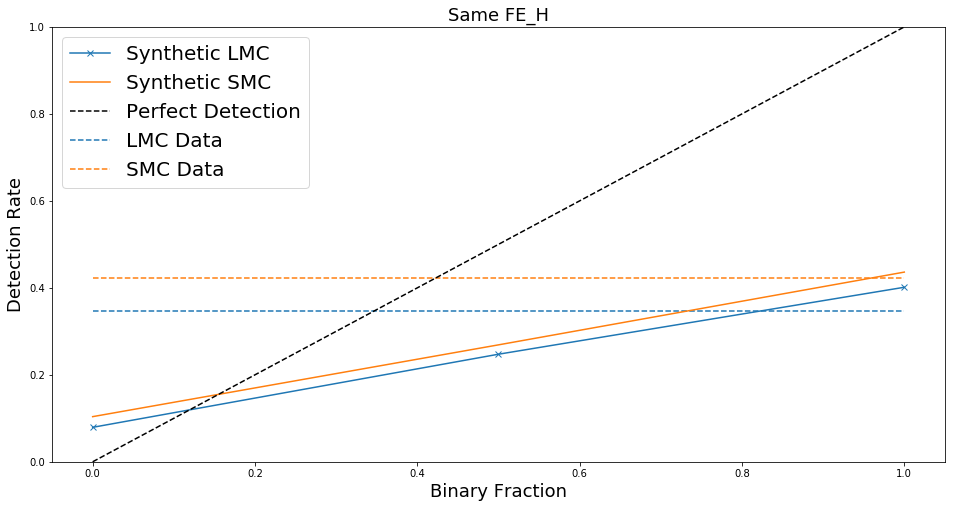

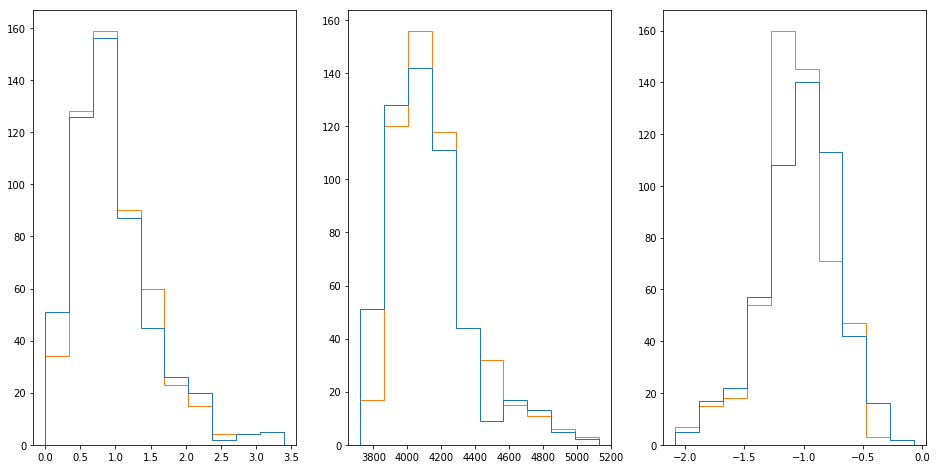

In [33]:
lmc_sim, smc_sim = same_dat(lmc, smc, temp_lim=250, logg_lim=0.2, feh_lim=0.2)
mu = 3
sigma = 2.4
a = 0.3
b = 0.61
lmc_err_j = error_with_jitter(lmc_sim['RADIAL_ERR'], a, b, lmc_sim['LOGG'])
lmc_detection_rate_j = binary_fraction(lmc_sim['RADIALV'], lmc_err_j)

smc_err_j = error_with_jitter(smc_sim['RADIAL_ERR'], a, b, smc_sim['LOGG'])
smc_detection_rate_j = binary_fraction(smc_sim['RADIALV'], smc_err_j)


lmc_syn_list1 = synthetic_fractions(30, lmc_sim, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
lmc_syn_list0 = synthetic_fractions(30, lmc_sim, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
lmc_syn_list05 = synthetic_fractions(30, lmc_sim, 0.5, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)

smc_syn_list1 = synthetic_fractions(30, smc_sim, 1, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
smc_syn_list0 = synthetic_fractions(30, smc_sim, 0, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
smc_syn_list05 = synthetic_fractions(30, smc_sim, 0.5, 
                               100*u.jupiterMass, mu, sigma,
                               a, b)
fig = plt.figure(figsize = (16,8))
plt.plot([0,0.5,1], [np.mean(lmc_syn_list0),np.mean(lmc_syn_list05), np.mean(lmc_syn_list1)],'x-' ,label = 'Synthetic LMC')
plt.plot([0,0.5,1], [np.mean(smc_syn_list0),np.mean(smc_syn_list05), np.mean(smc_syn_list1)], label = 'Synthetic SMC')
plt.hlines(lmc_detection_rate_j, 0, 1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.hlines(smc_detection_rate_j, 0, 1, color = 'C1', linestyles='dashed', label = 'SMC Data')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('Same FE_H', size = 18)
plt.ylim(0,1)
plt.legend(prop = {'size': 20}, loc = 2)
plt.show()

fig2, ax = plt.subplots(1,3, figsize = (16,8))
ax[0].hist([lmc_sim['LOGG'], smc_sim['LOGG']], histtype='step',)
ax[1].hist([lmc_sim['TEFF'], smc_sim['TEFF']], histtype='step',)
ax[2].hist([lmc_sim['FE_H'], smc_sim['FE_H']], histtype='step',)
plt.show()

# Testing some stuff

In [1]:
%run "/home/cody/Binary Search/DataSimp"
tables = DataSimp("/home/cody/Binary Search/mc_rgb_nocuts.fits",
                  "/home/cody/Binary Search/allVisit-l31c.2.fits",
                  "/home/cody/Binary Search/parsec_decamsdss_all.fits.gz")

# Get the data from the fits files
all_average, all_visit, iso = tables.get_data()

In [18]:
Table(all_average[all_average['APOGEE_ID'] == "2M05135760-6927482"])

APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,H,H_ERR,K,K_ERR,RA,DEC,GLON,GLAT,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,TARGFLAGS,SURVEY,NINST [3],NVISITS,COMBTYPE,COMMISS,SNR,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,VERR_MED,OBSVHELIO_AVG,OBSVSCATTER,OBSVERR,OBSVERR_MED,SYNTHVHELIO_AVG,SYNTHVSCATTER,SYNTHVERR,SYNTHVERR_MED,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CCFWHM,RV_AUTOFWHM,SYNTHSCATTER,STABLERV_CHI2 [2],STABLERV_RCHI2 [2],CHI2_THRESHOLD [2],STABLERV_CHI2_PROB [2],MEANFIB,SIGFIB,SNREV,APSTAR_VERSION,ASPCAP_VERSION,RESULTS_VERSION,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,PARAM [9],FPARAM [9],"PARAM_COV [9,9]","FPARAM_COV [9,9]",TEFF,TEFF_ERR,LOGG,LOGG_ERR,VMICRO,VMACRO,VSINI,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,ASPCAP_CHI2,ASPCAP_CLASS,ASPCAPFLAG,ASPCAPFLAGS,PARAMFLAG [9],FELEM [26],FELEM_ERR [26],X_H [26],X_H_ERR [26],X_M [26],X_M_ERR [26],C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CU_FE,GE_FE,RB_FE,Y_FE,ND_FE,C_FE_ERR,CI_FE_ERR,N_FE_ERR,O_FE_ERR,NA_FE_ERR,MG_FE_ERR,AL_FE_ERR,SI_FE_ERR,P_FE_ERR,S_FE_ERR,K_FE_ERR,CA_FE_ERR,TI_FE_ERR,TIII_FE_ERR,V_FE_ERR,CR_FE_ERR,MN_FE_ERR,FE_H_ERR,CO_FE_ERR,NI_FE_ERR,CU_FE_ERR,GE_FE_ERR,RB_FE_ERR,Y_FE_ERR,ND_FE_ERR,C_FE_FLAG,CI_FE_FLAG,N_FE_FLAG,O_FE_FLAG,NA_FE_FLAG,MG_FE_FLAG,AL_FE_FLAG,SI_FE_FLAG,P_FE_FLAG,S_FE_FLAG,K_FE_FLAG,CA_FE_FLAG,TI_FE_FLAG,TIII_FE_FLAG,V_FE_FLAG,CR_FE_FLAG,MN_FE_FLAG,FE_H_FLAG,CO_FE_FLAG,NI_FE_FLAG,CU_FE_FLAG,GE_FE_FLAG,RB_FE_FLAG,Y_FE_FLAG,ND_FE_FLAG,ELEM_CHI2 [26],ELEMFLAG [26],REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK [50],VISIT_PK [50],"FPARAM_CLASS [23,9]",CHI2_CLASS [23],LMCPA,LMCRAD,SMCPA,SMCRAD,MLON,MLAT,M,MERR,DDO51ERR,T2,T2ERR,DELTA_VHELIO,DELTA_PMRA,DELTA_PMDEC,DELTA_FEH,DELTA_ALPHA,TARGET_TYPE,TARGET_NAME,PRIORITY,GAIA_SOURCEID,GAIA_PARALLAX,GAIA_PARALLAX_ERROR,GAIA_DIST05,GAIA_DIST_MODE,GAIA_DIST95,GAIA_PMRA,GAIA_PMRA_ERROR,GAIA_PMDEC,GAIA_PMDEC_ERROR,GAIA_GMAG,GAIA_BPMAG,GAIA_RPMAG,GAIA_PML,GAIA_PMB,GAIA_PMML,GAIA_PMMB
str47,str36,str59,str38,str18,str8,int32,str5,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,int32,int32,int32,int32,int32,int32,str192,str35,int32,int32,int32,int16,float32,int32,str165,int32,str58,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,str4,str7,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,int32,str189,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float32,int32,str23,str14,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str17,float32,float32,int16,int16,float32,float32,str20,str1044,str917,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,f

In [15]:
Table(all_visit)

VISIT_ID,APRED_VERSION,APOGEE_ID,TARGET_ID,FILE,FIBERID,PLATE,MJD,TELESCOPE,LOCATION_ID,RA,DEC,GLON,GLAT,J,J_ERR,H,H_ERR,K,K_ERR,RA_TARG,DEC_TARG,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,SURVEY,TARGFLAGS,SNR,STARFLAG,STARFLAGS,DATEOBS,JD,BC,VTYPE,VREL,VRELERR,VHELIO,VLSR,VGSR,CHISQ,RV_TEFF,RV_FEH,RV_LOGG,RV_ALPHA,RV_CARB,SYNTHFILE,ESTVTYPE,ESTVREL,ESTVRELERR,ESTVHELIO,SYNTHVREL,SYNTHVRELERR,SYNTHVHELIO,OBSVREL,OBSVRELERR,OBSVHELIO,FIELD,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,COMMISS,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC
str56,str2,str18,str34,str45,int16,str13,int32,str6,int16,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,int32,int32,int32,str14,str135,float32,int32,str74,str23,float64,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str23,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,str16,int32,int32,int32,int16,int16,float32,float32,float32,float32,str23,str12,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str17,float32,float32,int16,int16,float32,float32,str20


In [9]:
all_average['FIELD']

chararray(['LMC9', 'LMC9', 'LMC9', ..., 'SMC7', 'SMC7', 'SMC7'],
          dtype='<U5')

In [4]:
r12_visit = fits.getdata('/home/cody/Binary Search/Data/allVisit-r12-noaspcap-58358.fits')

In [5]:
for ID in all_visit['APOGEE_ID']:
    bob = r12_visit[r12_visit['APOGEE_ID'] == ID]
    if len(bob) > 0:
        print(ID)

2M04020847-7201193
2M04012640-7202047
2M04005359-7205349
2M04003891-7159541
2M04011958-7201236
2M04001742-7201374
2M04054488-7211450
2M04054641-7213429
2M04040878-7211273
2M04024648-7204371
2M04044141-7203293
2M04071455-7213376
2M04073497-7220582
2M04075308-7221569
2M04055440-7222451
2M04070091-7217143
2M04053043-7220172
2M04005062-7209291
2M04034488-7219599
2M04033217-7218399
2M04013828-7220478
2M04024846-7208064
2M04015121-7213280
2M04053915-7227016
2M04043816-7225520
2M04034244-7231217
2M04031962-7224248
2M04023536-7129164
2M04040045-7136408


KeyboardInterrupt: 

In [9]:
ID = "2M04070091-7217143"
Table(r12_visit[r12_visit['APOGEE_ID'] == ID])

VISIT_ID,APRED_VERSION,APOGEE_ID,TARGET_ID,FILE,FIBERID,PLATE,MJD,TELESCOPE,SURVEY,FIELD,PROGRAMNAME,LOCATION_ID,RA,DEC,GLON,GLAT,J,J_ERR,H,H_ERR,K,K_ERR,RA_TARG,DEC_TARG,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,TARGFLAGS,SNR,STARFLAG,STARFLAGS,DATEOBS,JD,BC,VTYPE,VREL,VRELERR,VHELIO,VLSR,VGSR,CHISQ,RV_TEFF,RV_FEH,RV_LOGG,RV_ALPHA,RV_CARB,SYNTHFILE,ESTVTYPE,ESTVREL,ESTVRELERR,ESTVHELIO,SYNTHVREL,SYNTHVRELERR,SYNTHVHELIO,OBSVREL,OBSVRELERR,OBSVHELIO,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,COMMISS,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC
str57,str3,str18,str36,str46,int16,str13,int32,str6,str14,str16,str18,int16,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,int32,int32,int32,str192,float32,int32,str74,str23,float64,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str18,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int16,int16,float32,float32,float32,float32,str23,str14,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str17,float32,float32,int16,int16,float32,float32,str20
apogee.lco25m.s.r12.10064.58054.284,r12,2M04070091-7217143,LMC1.2M04070091-7217143,asVisit-r12-10064-58054-284.fits,284,10064,58054,lco25m,apogee2s,LMC1,magclouds,5481,61.753808,-72.287308,286.07507574295903,-37.762312166103484,14.117,0.029,13.187,0.028,13.033,0.035,0.0,0.0,0,0,0,"APOGEE2_WASH_GIANT,APOGEE2_MAGCLOUD_CANDIDATE",17.8402,0,,2017-10-28T06:36:44.418,2458054.78131,-5.767442,4,236.60017,0.055551015,230.83273,224.6428,57.520473,1.7402098,3800.0,-1.0,1.0,0.5,0.0,apg_synthgrid.fits,2,236.64937,0.078684404,230.87773,236.47665,0.05371137,230.70921,236.60017,0.055551015,230.83273,-2139094912,0,0,0,1,-9999.99,9999.99,-9999.99,9999.99,2M04070091-7217143,2MASS,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,12.964,0.023,-9999.99,-9999.99,0.050665345,SFD,0.15881449,0.16776605,-1,1,3.6,-0.0,HSOY
apogee.lco25m.s.r12.10064.58058.239,r12,2M04070091-7217143,LMC1.2M04070091-7217143,asVisit-r12-10064-58058-239.fits,239,10064,58058,lco25m,apogee2s,LMC1,magclouds,5481,61.753808,-72.287308,286.07507574295903,-37.762312166103484,14.117,0.029,13.187,0.028,13.033,0.035,0.0,0.0,0,0,0,"APOGEE2_WASH_GIANT,APOGEE2_MAGCLOUD_CANDIDATE",32.5349,4,BRIGHT_NEIGHBOR,2017-11-01T06:30:18.798,2458058.79423,-5.857803,4,236.1672,0.032012794,230.3094,224.11948,56.997143,2.0155017,3800.0,-1.0,1.0,0.5,0.0,apg_synthgrid.fits,2,236.47005,0.032511417,230.60896,236.15698,0.0312503,230.29918,236.1672,0.032012794,230.3094,-2139094912,0,0,0,1,-9999.99,9999.99,-9999.99,9999.99,2M04070091-7217143,2MASS,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,-9999.99,12.964,0.023,-9999.99,-9999.99,0.050665345,SFD,0.15881449,0.16776605,-1,1,3.6,-0.0,HSOY
apogee.lco25m.s.r12.10103.58091.280,r12,2M04070091-7217143,LMC1.2M04070091-7217143,asVisit-r12-10103-58091-280.fits,280,10103,58091,lco25m,apogee2s,LMC1,magclouds,5504,61.753808,-72.287308,286.07507574295903,-37.762312166103484,14.117,0.029,13.187,0.028,13.033,0.035,0.0,0.0,0,0,0,"APOGEE2_WASH_GIANT,APOGEE2_MAGCLOUD_CANDIDATE",25.7367,0,,2017-12-04T03:13:15.482,2458091.65739,-5.350843,4,236.60541,0.03998882,231.25456,225.06464,57.942303,2.1148403,3800.0,-1.0,1.0,0.5,0.0,apg_synthgrid.fits,2,236.58398,0.09594853,231.22815,236.621,0.040106777,231.27016,236.60541,0.03998882,231.25456,-2139094912,0,0,0,1,-9999.99,9999.99,-9999.99,9999.99,2M04070091-7217143,2MASS,-

In [10]:
Table(all_visit[all_visit['APOGEE_ID'] == ID])

APOGEE_ID,TARGET_ID,FILE,FIBERID,PLATE,MJD,TELESCOPE,SURVEY,FIELD,PROGRAMNAME,LOCATION_ID,RA,DEC,GLON,GLAT,J,J_ERR,H,H_ERR,K,K_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,RA_TARG,DEC_TARG,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,TARGFLAGS,SNR,STARFLAG,STARFLAGS,DATEOBS,JD,BC,VTYPE,VREL,VRELERR,VHELIO,VLSR,VGSR,CHISQ,RV_TEFF,RV_FEH,RV_LOGG,RV_ALPHA,RV_CARB,SYNTHFILE
str19,str18,str31,int16,str12,int32,str6,str8,str6,str10,int16,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,str9,float32,float32,float64,float64,int32,int32,int32,str102,float32,int32,str62,str23,float64,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str20
2M04070091-7217143,2M04070091-7217143,asVisit-t9-10064-58054-284.fits,284,10064,58054,lco25m,apogee2s,LMC-1,magclouds,5481,61.7538078232,-72.287308,286.0750757789914,-37.76231221173209,14.117,0.0,13.187,0.0,13.033,0.0,-99.0,none,-99.0,-99.0,0.0,0.0,-2139094912,0,0,"APOGEE2_WASH_GIANT,APOGEE2_MAGCLOUD_CANDIDATE",17.8995,0,,2017-10-28T06:36:44.418,2458054.78131,-5.701287,2,236.54443,0.07702095,230.84314,224.65321,57.530888,2.3523514,4000.0,0.0,3.5,99.9,99.9,apg_rvsynthgrid.fits
2M04070091-7217143,2M04070091-7217143,asVisit-t9-10064-58058-239.fits,239,10064,58058,lco25m,apogee2s,LMC-1,magclouds,5481,61.7538078232,-72.287308,286.0750757789914,-37.76231221173209,14.117,0.0,13.187,0.0,13.033,0.0,-99.0,none,-99.0,-99.0,0.0,0.0,-2139094912,0,0,"APOGEE2_WASH_GIANT,APOGEE2_MAGCLOUD_CANDIDATE",32.2112,4,BRIGHT_NEIGHBOR,2017-11-01T06:30:18.798,2458058.79423,-5.7893033,2,236.59802,0.036069956,230.80872,224.61879,57.49646,2.2219818,3500.0,-1.0,2.0,99.9,99.9,apg_rvsynthgrid.fits
2M04070091-7217143,2M04070091-7217143,asVisit-t9-10103-58091-280.fits,280,10103,58091,lco25m,apogee2s,LMC1,magclouds,5504,61.7538081656,-72.287308,286.0750757092093,-37.76231212336537,14.117,0.0,13.187,0.0,13.033,0.0,-99.0,none,-99.0,-99.0,0.0,0.0,-2139094912,0,0,"APOGEE2_WASH_GIANT,APOGEE2_MAGCLOUD_CANDIDATE",25.8096,0,,2017-12-04T03:13:15.482,2458091.65739,-5.288356,2,236.33582,0.047442596,231.04745,224.85753,57.7352,2.1531532,3500.0,-1.0,2.0,99.9,99.9,apg_rvsynthgrid.fits
2M04070091-7217143,2M04070091-7217143,asVisit-t9-10103-58094-094.fits,94,10103,58094,lco25m,apogee2s,LMC1,magclouds,5504,61.7538081656,-72.287308,286.0750757092093,-37.76231212336537,14.117,0.0,13.187,0.0,13.033,0.0,-99.0,none,-99.0,-99.0,0.0,0.0,-2139094912,0,0,"APOGEE2_WASH_GIANT,APOGEE2_MAGCLOUD_CANDIDATE",17.919,0,,2017-12-07T03:57:11.585,2458094.67051,-5.1651726,2,236.0522,0.06513131,230.88702,224.6971,57.574768,1.515281,3500.0,-1.0,2.0,99.9,99.9,apg_rvsynthgrid.fits
2M04070091-7217143,2M04070091-7217143,asVisit-t9-10103-58414-196.fits,196,10103,58414,lco25m,apogee2s,LMC1,magclouds,5504,61.753808,-72.287308,286.07507574295903,-37.762312166103484,14.117,0.0,13.187,0.0,13.033,0.0,0.0506653,SFD,0.158814,0.167766,0.0,0.0,-2139094912,0,0,"APOGEE2_WASH_GIANT,APOGEE2_MAGCLOUD_CANDIDATE",26.9927,0,,2018-10-23T06:36:02.333,2458414.79821,-5.561221,2,236.01773,0.04306187,230.45651,224.26657,57.14425,1.8460383,3500.0,-1.0,2.0,99.9,99.9,apg_rvsynthgrid.fits
2M04070091-7217143,2M04070091-7217143,asVisit-t9-10103-58443-285.fits,285,10103,58443,lco25m,apogee2s,LMC1,magclouds,5504,61.753808,-72.287308,286.07507574295903,-37.762312166103484,14.117,0.0,13.187,0.0,13.033,0.0,0.0506653,SFD,0.158814,0.167766,0.0,0.0,-2139094912,0,0,"APOGEE2_WASH_GIANT,APOGEE2_MAGCLOUD_CANDIDATE",20.4947,0,,2018-11-21T05:04:08.146,2458443.717,-5.7224846,2,236.65358,0.059790358,230.93109,224.74117,57.618835,1.5742524,3500.0,-1.0,2.0,99.9,99.9,apg_rvsynthgrid.fits
2M04070091-7217143,2M04070091-7217143,asVisit-t9-10103-58446-291.fits,291,10103,58446,lco25m,apogee2s,LMC1,magclouds,5504,61.753808,-72.287308,286.07507574295903,-37.762312166103484,14.117,0.0,13.187,0.0,13.033,0.0,0.0506653,SFD,0.158814,0.167766,0.0,0.0,-2139094912,0,0,"APOGEE2_WASH_GIANT,APOGEE2_MAGCLOUD_CANDIDATE",29.3178,0,,2018-11-24T03:50:43.388,2458446.6

In [11]:
max(r12_visit['MJD'])

58358

In [12]:
max(all_visit['MJD'])

58481